## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.4 MB/s eta 0:00:01    |█████▌                          | 1.7 MB 3.4 MB/s eta 0:00:03     |████████████                    | 3.8 MB 3.4 MB/s eta 0:00:02
     |████████████████████████████████| 215 kB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 65.9 MB/s eta 0:00:01    |████████████▍                   | 7.8 MB 65.9 MB/s eta 0:00:01     |██████████████████              | 11.4 MB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 39.8 MB/s eta 0:00:01    |██████████████████████▋         | 8.8 MB 39.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.4 MB/s eta 0:

In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   2088      0 --:--:-- --:--:-- --:--:--  2088
100 46592  100 46592    0     0   189k      0 --:--:-- --:--:-- --:--:--  189k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,
Algeria,15,17,17,19,21,25,26,29,31,35,44,58,86
Austria,8,16,21,28,30,49,58,68,86,108,128,146,158
Belgium,67,75,88,122,178,220,289,353,431,513,705,828,1011
Brazil,15,25,34,46,59,77,92,111,136,159,201,240,324
China,3139,3153,3153,3160,3163,3169,3174,3177,3182,3186,3187,3193,3199
Denmark,13,13,24,32,34,41,52,65,72,77,90,104,123
Dominican Republic,2,3,3,6,10,10,20,28,39,42,51,57,60
Ecuador,7,14,18,27,28,34,36,48,58,60,75,93,120
France,562,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(9)
display(df9) 

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,
France,112,186,240,231,365,299,319,292,418,499,509,1355
US,110,140,149,236,267,372,445,441,511,895,884,1169
Spain,397,539,497,839,718,773,844,821,913,748,923,961
Italy,651,601,743,683,712,919,889,756,812,837,727,760
United Kingdom,48,54,87,43,113,181,260,209,180,381,563,569
Germany,10,29,34,49,61,75,91,100,112,130,145,187
Belgium,8,13,34,56,42,69,64,78,82,192,123,183
Netherlands,43,34,63,80,78,112,93,132,93,175,134,166
Iran,129,127,122,143,157,144,139,123,117,141,138,124


In [7]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
112,186,240,231,365,299,319,292,418,499,509,1355"
data-datasets="110,140,149,236,267,372,445,441,511,895,884,1169"
data-datasets="397,539,497,839,718,773,844,821,913,748,923,961"
data-datasets="651,601,743,683,712,919,889,756,812,837,727,760"
data-datasets="48,54,87,43,113,181,260,209,180,381,563,569"
data-datasets="10,29,34,49,61,75,91,100,112,130,145,187"
data-datasets="8,13,34,56,42,69,64,78,82,192,123,183"
data-datasets="43,34,63,80,78,112,93,132,93,175,134,166"
data-datasets="129,127,122,143,157,144,139,123,117,141,138,124


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,China,Denmark,Dominican Republic,Ecuador,France,Germany,...,Netherlands,Philippines,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/22/20,2,8,8,10,14,0,1,7,112,10,...,43,6,2,3,397,1,23,21,48,110
3/23/20,0,5,13,9,0,11,0,4,186,29,...,34,8,9,4,539,4,22,7,54,140
3/24/20,2,7,34,12,7,8,3,9,240,34,...,63,2,10,4,497,11,2,7,87,149
3/25/20,2,2,56,13,3,2,4,1,231,49,...,80,3,10,6,839,26,31,15,43,236
3/26/20,4,19,42,18,6,7,0,6,365,61,...,78,7,17,6,718,15,38,16,113,267
3/27/20,1,9,69,15,5,11,10,2,299,75,...,112,9,16,3,773,28,40,17,181,372
3/28/20,3,10,64,19,3,13,8,12,319,91,...,93,14,24,11,844,0,33,16,260,445
3/29/20,2,18,78,25,5,7,11,10,292,100,...,132,3,19,6,821,5,36,23,209,441
3/30/20,4,22,82,23,4,5,3,2,418,112,...,93,7,21,22,913,36,59,37,180,511
3/31/20,9,20,192,42,1,13,9,15,499,130,...,175,10,20,17,748,34,74,46,381,895


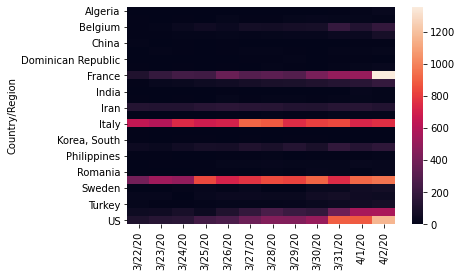

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

27 12.5


Country/Region
Algeria               7.0
Austria               0.8
Belgium               1.9
Brazil                2.6
China                 1.3
Denmark               2.8
Dominican Republic    0.6
Ecuador               3.8
France                2.6
Germany               1.6
India                 4.6
Indonesia             1.7
Iran                  1.1
Ireland               1.5
Italy                 0.9
Japan                 3.0
Korea, South          0.5
Netherlands           1.3
Philippines           1.9
Portugal              1.2
Romania               1.2
Spain                 1.1
Sweden                3.1
Switzerland           1.1
Turkey                2.4
United Kingdom        2.9
US                    2.2
dtype: float64

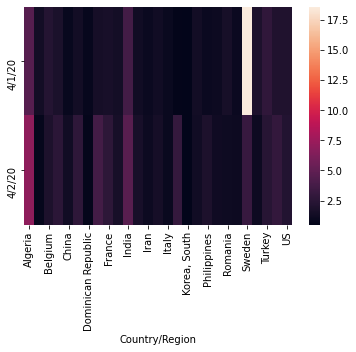

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/2/20
Country/Region,
Algeria,4.463768
France,3.162529
Brazil,3.090301
Ecuador,2.801887
Turkey,2.665644
Sweden,2.644599
Japan,2.619048
United Kingdom,2.370833
India,2.369231


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)